# Исследование тарифных планов

##  Задача исследования 

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Ознакомление с данными

У нас есть 5 таблиц содержащих информацию о клиентах и совершенных ими действиях (звонки, сообщения, серфинг интернета), есть таблица с условям тарифов. Последовательно откроем эти таблицы и изучим общую информацию.

In [1]:
# импорт библиотек
import pandas as pd
import datetime
import math
import scipy as sp
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Функция для предварительного ознакомления с данными. 

def hello_data(data):
    
    ''' Выводит первые строки, 
                info, 
                уникальные значения
                и пропуски, если они есть '''
    
    columns = data.columns 
    display(data.head(10))
    display(data.info())
    lost_values = data.duplicated().sum()
   
    print(
        f'Явных дубликатов в данных: {lost_values}. Это {lost_values / len(data) * 100:.2f}% от всех значений.'
         )
    print()
        
    for column in columns: # для каждой колонки
        try:
            unique_value = (len(data[column].unique())) # считаем уникальные значения 
        except AssertionError:
            pass
        
        if data[column].isna().sum() != 0: # если в колонке есть пропуски
            print( f'Уникальных значений в колонке {column} - {unique_value}') #выводим количество уникальных значений
            persent = (data[column].isna().sum() / len(data[column]) * 100) # считаем сколько это в процентах и округляем методом "round"
            print('Пропущенных строк в колонке {} - {:.1f} %'.format(column, persent))
            print("_"*20)
        else: print( f'Уникальных значений в колонке {column} - {unique_value}') # если пропусков не нашли, то выводим количество уникальных значений  

### Клиенты

In [3]:
users = pd.read_csv(*)
 
hello_data(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Явных дубликатов в данных: 0. Это 0.00% от всех значений.

Уникальных значений в колонке user_id - 500
Уникальных значений в колонке age - 58
Уникальных значений в колонке churn_date - 34
Пропущенных строк в колонке churn_date - 92.4 %
____________________
Уникальных значений в колонке city - 76
Уникальных значений в колонке first_name - 246
Уникальных значений в колонке last_name - 419
Уникальных значений в колонке reg_date - 270
Уникальных значений в колонке tariff - 2


Таблица users (информация о пользователях) содержит следующие колонки:

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом 
- city — город проживания пользователя
- tarif — название тарифного плана

Видим несоответствие типа данных содержимому в колонках 'churn_date' и 'reg_date'. Сейчас это object при поготовке данных заменим его на datetime.
Пропуенные значения есть только в колонке 'churn_date', по условию дано, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Значит из 500 клиентов тарифом прекратили пользоваься 38 человек.

### Звонки

In [4]:
calls= pd.read_csv(*)

hello_data(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Явных дубликатов в данных: 0. Это 0.00% от всех значений.

Уникальных значений в колонке id - 202607
Уникальных значений в колонке call_date - 365
Уникальных значений в колонке duration - 2871
Уникальных значений в колонке user_id - 492


Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Снова видим не подходящий формат для даты, позже исправим. Пропущенных значений нет, а длительность звонков равная 0 означает, что звонок пропущен. Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Следовательо колонку 'duration' можно будет округлить до целых значений и привести к типу int. В колонке 'user_id' только 492 уникальных значения. Здесь 2 варианта: либо эти люди не звонили в течение года, либо данные выгрузились не полностью.

### Интернет-трафик

In [5]:
internet = pd.read_csv(*)

hello_data(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

Явных дубликатов в данных: 0. Это 0.00% от всех значений.

Уникальных значений в колонке id - 149396
Уникальных значений в колонке mb_used - 70003
Уникальных значений в колонке session_date - 365
Уникальных значений в колонке user_id - 497


Таблица internet (информация об интернет-сессиях):
    
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Пропущенных значений нет, но даты сессий нужно будет привести к типу datetime. Здесь также меньше 500 'user_id'.

### Сообщения

In [6]:
messages= pd.read_csv(*)

hello_data(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Явных дубликатов в данных: 0. Это 0.00% от всех значений.

Уникальных значений в колонке id - 123036
Уникальных значений в колонке message_date - 364
Уникальных значений в колонке user_id - 426


Таблица messages (информация о сообщениях):
    
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Дату приведем к типу datetime. Данные выгружены только за 364 дня, а уникальных  'user_id' только 426. Предположим, что часть клиентов не  пишут смс и по ним нет данных, но очень маловероятно, что это случилось в один день. Данные выгружены не полностью.

### Тарифы

In [7]:
tariffs= pd.read_csv(*)

hello_data(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Явных дубликатов в данных: 0. Это 0.00% от всех значений.

Уникальных значений в колонке messages_included - 2
Уникальных значений в колонке mb_per_month_included - 2
Уникальных значений в колонке minutes_included - 2
Уникальных значений в колонке rub_monthly_fee - 2
Уникальных значений в колонке rub_per_gb - 2
Уникальных значений в колонке rub_per_message - 2
Уникальных значений в колонке rub_per_minute - 2
Уникальных значений в колонке tariff_name - 2


Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица заполненна корректно, однако цены указаны за гигабайты, а лимит указан в мегабайтах. Пересчитаем значения 'mb_per_month_included' на гигабайты и переименуем колонку на 'gb_per_month_included'. Заодно переименуем название колонки тарифов чтобы удобнее было объединять ее с таблицей пользователей.

In [8]:
# переводим в Гб
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
# замена названия колонки
tariffs = tariffs.rename(columns={'tariff_name': 'tariff', 'mb_per_month_included': 'gb_per_month_included'})
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


## Подготовка данных

В этом разделе поменяем значения в колонках о времени на datetime, округлим до больших значений минуты и мегабайты,
посчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Минуты округлим сразу, а потраченные мегабайты уже после подсчетов за месяц переведем в гигабайты и затем округлим.

In [9]:
# Меняем тип данных на datetime, где это нужно 
users['churn_date'] = pd.to_datetime(
    users['churn_date'], format='%Y-%m-%d')

users['reg_date'] = pd.to_datetime(
    users['reg_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d')

In [10]:
# создаем колонку для подсчета количества звонков и заполняем единицами
calls['calls_count'] = "1"
# округляем в большую сторону использованные минуты и переводим в инт.
calls['duration'] = np.ceil(calls['duration']).astype(int)

# проверочка
display(calls.head())
internet.head()

,id,call_date,duration,user_id,calls_count
0,1000_0,2018-07-25,0,1000,1
1,1000_1,2018-08-17,0,1000,1
2,1000_2,2018-06-11,3,1000,1
3,1000_3,2018-09-21,14,1000,1
4,1000_4,2018-12-15,6,1000,1


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Подсчеты по месяцам

Нам нужно знать сколько по итогам месяца каждый уникальный пользователь использовал минут, сообщений, и трафика. Для этого в каждой таблице создадим  колонку 'month', а затем сгруппируем данные по 'id' и суммарному показателю по 'month'. Считаем:


- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

In [11]:
# создаем колонки month в наших таблицах 
calls['month'] = pd.DatetimeIndex(calls['call_date']).month 
messages['month'] = pd.DatetimeIndex(messages['message_date']).month 
internet['month'] = pd.DatetimeIndex(internet['session_date']).month 

In [12]:
# группируем каждую таблицу по id и показателю за месяц методом agg(), чтобы избавиться от мультииндекса делаем reset_index()
data_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'calls_count':'count'}) .reset_index()
data_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}) .reset_index()
data_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}) .reset_index()
# проверочка
data_calls.head()

,user_id,month,duration,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Чтобы избежать в дальнейшем путаницы заменим в data_messages название колонки хранящей количество отправленных сообщений за месяц с 'id' на 'messages_count'

In [13]:
# замена названия колонки
data_messages = data_messages.rename(columns={'id': 'messages_count'})
data_messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [14]:
#создаем новую колонку и переводим мегабайты в гигабайты 
data_internet['gb_used'] = data_internet['mb_used'] / 1024
# округляем гигабайты до большего значения(по условию задачи) и переводим в тип инт
data_internet['gb_used'] = (data_internet['gb_used']).apply(np.ceil).astype(int)
# проверочка
data_internet.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


### Объединение таблиц

Последовательно соберем наши таблицы в одну общую, применив метод merge. Для начала соберем в одну промежуточную таблицу минуты, сообщения и трафик, объединивих по id клиента и месяцу. Вторым  действием объединим таблицу users c промежуточной

In [15]:
# собираем промежуточную по 'user_id', 'month'
#по очереди соединяем данные о минутах, сообщениях и интернет-трафике
data_used = data_calls.merge(data_messages, on=['user_id', 'month'], how='outer')
data_used = data_used.merge(data_internet, on=['user_id', 'month'], how='outer')
data_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   duration        3174 non-null   float64
 3   calls_count     3174 non-null   float64
 4   messages_count  2717 non-null   float64
 5   mb_used         3203 non-null   float64
 6   gb_used         3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


In [16]:
# объявляем переменную df, в которую соберем нашу итоговую таблицу. 
# объединяем данные о пользователях и данные о тарифах
df = users.merge(tariffs, on='tariff', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   age                    500 non-null    int64         
 2   churn_date             38 non-null     datetime64[ns]
 3   city                   500 non-null    object        
 4   first_name             500 non-null    object        
 5   last_name              500 non-null    object        
 6   reg_date               500 non-null    datetime64[ns]
 7   tariff                 500 non-null    object        
 8   messages_included      500 non-null    int64         
 9   gb_per_month_included  500 non-null    float64       
 10  minutes_included       500 non-null    int64         
 11  rub_monthly_fee        500 non-null    int64         
 12  rub_per_gb             500 non-null    int64         
 13  rub_p

In [17]:
# добавляем в итоговую таблицу промежуточную
df = df.merge(data_used, on=['user_id'], how='outer')
display(df.head())
df.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,duration,calls_count,messages_count,mb_used,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,5.0,159.0,22.0,22.0,2253.49,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,6.0,172.0,43.0,60.0,23233.77,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,7.0,340.0,47.0,75.0,14003.64,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,8.0,408.0,52.0,81.0,14055.93,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,9.0,466.0,58.0,57.0,14568.91,15.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   messages_included      3216 non-null   int64         
 9   gb_per_month_included  3216 non-null   float64       
 10  minutes_included       3216 non-null   int64         
 11  rub_monthly_fee        3216 non-null   int64         
 12  rub_per_gb             3216 non-null   int64         
 13  rub

Таблица создана, но в данных теперь есть отсутствующие значения. Чтобы эти значения не помешали дальнейшим расчетам заменим их на 0 в следующих колонках: 'duration', 'messages_count', 'mb_used', 'gb_used'.

In [18]:
 # перебор названий столбцов в цикле и замена пропущенных значений на 0, заодно приведем колонки к типу int
columns_to_replace = ['duration', 'messages_count', 'mb_used', 'gb_used'] 
for column in columns_to_replace:
    df[column] = df[column].fillna(0)
    df[column] = df[column].astype(int)

# проверяем, что не потеряли данные пользователей
len(df['user_id'].unique())

500

### Подсчет выручки с кадого пользователя

Напишем функцию для расчета выручки с каждого пользователя. Сохраним результаты в колонке 'total_income'.

По очереди вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [19]:
def total_income(row):
    minutes = 0
    message = 0
    trafic = 0
    
    if row['duration']> row['minutes_included']: # условие, что клиент превысил лимит по звонкам
        minutes = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    else:
        minutes = 0 # если превышения не было
        
    if row['messages_count']> row['messages_included']:# условие, что клиент превысил лимит по сообщениям
        message = (row['messages_count'] - row['messages_included']) * row['rub_per_message']
    else:
        message = 0  # если превышения не было
        
    if row['gb_used']> row['gb_per_month_included']: # условие, что клиент превысил лимит по трафику
        trafic = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_message']
    else:
        trafic = 0 # если превышения не было
    
    return row['rub_monthly_fee'] + minutes + message + trafic # итоговый расчет

# добавляем столбец в датафрейм
df['total_income'] = df.apply(total_income, axis=1).astype(int)
df.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,month,duration,calls_count,messages_count,mb_used,gb_used,total_income
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,150,1,1,5.0,159,22.0,22,2253,3,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,150,1,1,6.0,172,43.0,60,23233,23,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,150,1,1,7.0,340,47.0,75,14003,14,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,150,1,1,8.0,408,52.0,81,14055,14,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,150,1,1,9.0,466,58.0,57,14568,15,1950


##  Анализ поведения клиентов

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы, опишем распределения.

Создадим срезы основного датафрейма по интересующим нас колонкам, в два отдельных датафрейма по тарифам: 'smart_tariff' и 'ultra_tariff'.

C:\Users\Jane\anaconda3\envs\practicum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


smart    0.693408
ultra    0.306592
Name: tariff, dtype: float64

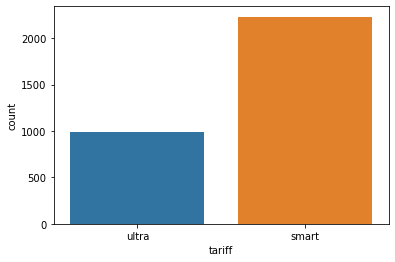

In [20]:
# посмотрим соотношение пользователей тарифов
sns.countplot(df.tariff)  
df.tariff.value_counts(normalize=True)

Пользоваелей тарифа 'smart' 70% против 30% пользователей тарифа 'ultra'. Пока очевидно, что люди,выбирая тариф, стараются платить за услуги связи поменьше. 

### Поведение пользователей тарифа Smart

In [21]:
# Создаем срез по тарифу и смотрим общую информацию
smart_tariff = (df[df['tariff'] == 'smart']
                           .loc[:,['user_id', 'city', 'age','reg_date', 'churn_date','month', 'calls_count', 'duration', 'minutes_included',
                                    'messages_count','messages_included',  'gb_used', 'gb_per_month_included', 'rub_monthly_fee', 'total_income']])
smart_tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 986 to 3215
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2230 non-null   int64         
 1   city                   2230 non-null   object        
 2   age                    2230 non-null   int64         
 3   reg_date               2230 non-null   datetime64[ns]
 4   churn_date             112 non-null    datetime64[ns]
 5   month                  2229 non-null   float64       
 6   calls_count            2223 non-null   float64       
 7   duration               2230 non-null   int32         
 8   minutes_included       2230 non-null   int64         
 9   messages_count         2230 non-null   int32         
 10  messages_included      2230 non-null   int64         
 11  gb_used                2230 non-null   int32         
 12  gb_per_month_included  2230 non-null   float64       
 13  r

Теперь  построим гистограммы по использованным минутам, сообщениям и трафику, посчитаем среднее, дисперсию и стандартное отклонение.

Для этого создадим функцию "data_stats"

In [22]:
def data_stats(column, column_name):
    
    sns.displot(column, kde_kws={'label': column_name}) 
        
    column_mean = column.mean()
    variance = np.var(column, ddof=1)
    column_std = np.std(column, ddof=1)
    
    print( f'Среднее значение показателя составляет: {round(column_mean, 2)}')
    print( f'Дисперсия показателя составляет: {round(variance,2)}')
    print( f'Стандартное отклонение показателя составляет: {round(column_std,2)}')

Среднее значение показателя составляет: 417.75
Дисперсия показателя составляет: 36281.39
Стандартное отклонение показателя составляет: 190.48


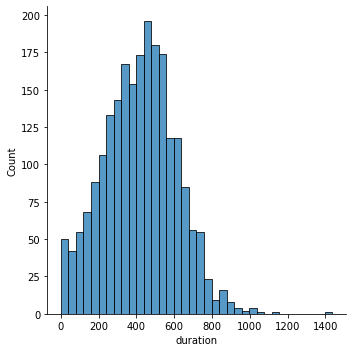

In [23]:
# вызываем функцию для тарифа смарт по минутам    
column = smart_tariff['duration'] 
column_name = 'использовано минут в месяц'
data_stats(column, column_name)   

Нормальное распредение, чуть скошенное влево. В среднем клиенты  используют по 417 минут в месяц.

Среднее значение показателя составляет: 33.37
Дисперсия показателя составляет: 796.96
Стандартное отклонение показателя составляет: 28.23


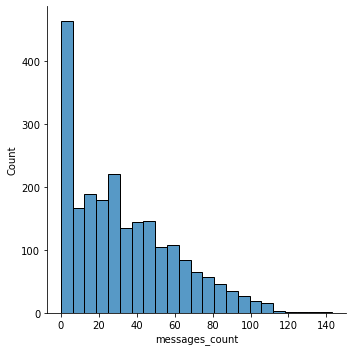

In [24]:
# вызываем функцию для тарифа смарт по сообщениям
column = smart_tariff['messages_count'] 
column_name = 'использовано сообщений в месяц'
data_stats(column, column_name) 

In [25]:
smart_tariff['messages_count'].min()

0

Видим распределене Пуассона. Есть клиенты, и их очень много, кто вообще не используют сообщения в течение месяца. В среднем же используют 33 сообщения, при большом стандартном отклонении - 28 сообщений.

Среднее значение показателя составляет: 16.32
Дисперсия показателя составляет: 33.13
Стандартное отклонение показателя составляет: 5.76


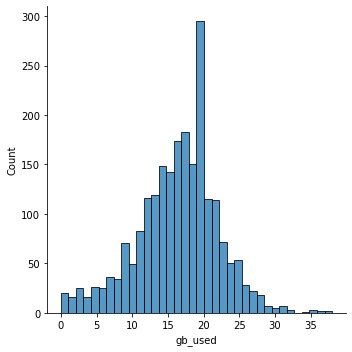

In [26]:
# вызываем функцию для тарифа смарт по интернет-трафику
column = smart_tariff['gb_used'] 
column_name = 'использовано Гб в месяц'
data_stats(column, column_name) 

Здесь тоже видим нормальное распределение, при этом присутствуют и выбросы. Кто-то очень любит сидеть в интернете. При лимите 15Гб есть много людей, кто превышает лимит где-то в районе 20ГБ. Об том нам говорит и среднее значение- 16 Гб.

Методом describe() посмотрим также минимальное и максимальное значения. Заодно проверим и другие показтели.

In [27]:
smart_tariff.describe()

,user_id,age,month,calls_count,duration,minutes_included,messages_count,messages_included,gb_used,gb_per_month_included,rub_monthly_fee,total_income
count,2230.000000,2230.000000,2229.000000,2223.000000,2230.000000,2230.0,2230.000000,2230.0,2230.000000,2230.0,2230.0,2230.000000
mean,1246.562332,46.557848,8.346792,58.621233,417.747534,500.0,33.369058,50.0,16.321525,15.0,550.0,701.115247
std,146.110501,16.349865,2.920316,25.796101,190.476754,0.0,28.230396,0.0,5.756167,0.0,0.0,262.905805
min,1001.000000,18.000000,1.000000,1.000000,0.000000,500.0,0.000000,50.0,0.000000,15.0,550.0,550.000000
25%,1121.000000,32.000000,6.000000,40.000000,282.000000,500.0,10.000000,50.0,13.000000,15.0,550.0,550.000000
50%,1240.000000,47.000000,9.000000,60.000000,421.500000,500.0,28.000000,50.0,17.000000,15.0,550.0,574.000000
75%,1376.000000,62.000000,11.000000,76.000000,545.000000,500.0,51.000000,50.0,20.000000,15.0,550.0,729.250000
max,1499.000000,75.000000,12.000000,198.000000,1435.000000,500.0,143.000000,50.0,38.000000,15.0,550.0,3412.000000


Теперь можно сделать следующий вывод: Типичный пользователь тарифа 'Smart' 32-62 лет(25-75 квартиль). Делает 60 звонков на 423 минут в месяц, при лимите 500 минут, использует 28 собщений из 50, и тратит на 2 гигабайта больше лимита. Вызывает интерес итоговый чек за месяц. При абонентской плате в 550 рублей больше 50% пользователей (медиана) платят больше - 574 рубля, среднее значение и того больше- 701 рубль. Есть и рекорд-  3412 рублей в месяц. 

Посмотрим подробнее на итоговый чек. Построим для начала ящик с усами по месяцам.

(0.0, 2500.0)

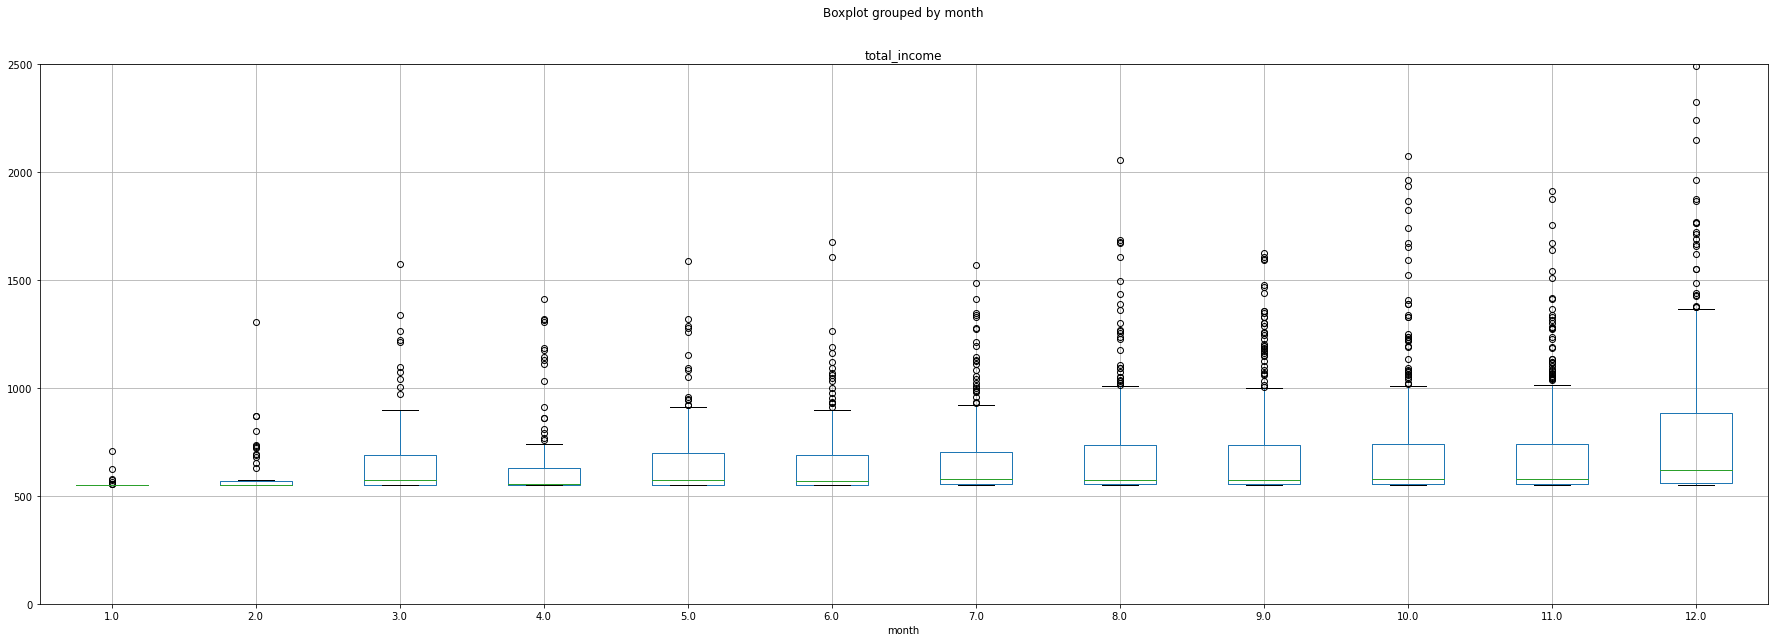

In [28]:
# строим  боксплот по чекам за месяц. 
#Взяли ограничене по оси y 2500, т.к. при попытке построить в границах от 0 до максимальной суммы 3412 рублей, график становился неинформативным.
smart_tariff.boxplot(column=['total_income'], by='month', return_type='axes', figsize=(30,10))
plt.ylim(0, 2500) 

Смущает, что в январе и феврале значений мало. Возможно это новый тариф? Посчитаем количество платежей  по месяцам:

In [29]:
# строим сводную таблицу по количеству платежей в месяц. 
# заодно сделаем колонку подсчета медианы за месяц. На боксплоте видно, что они отличаются. Хочется конкретики.
month_total_income_for_smart = smart_tariff.pivot_table(index = 'month', values = 'total_income', aggfunc = ['mean', 'count', 'median'])
month_total_income_for_smart

,mean,count,median
,total_income,total_income,total_income
month,,,
1.0,559.088235,34,550
2.0,603.431034,58,550
3.0,675.961039,77,571
4.0,646.482143,112,556
5.0,656.808511,141,571
6.0,663.469512,164,568
7.0,679.014925,201,577
8.0,700.255319,235,574


Да, можно видеть как количество клиентов стабильно увеличивалось к концу года. Также увеличивается и средний чек. Люди стабильно не укладываются в лимит. И происходит это из-за превышения лимита по интернету.

### Поведение пользователей тарифа Ultra

In [30]:
# Действуем по аналогии. Создаем срез по тарифу ультра и смотрим инфо
ultra_tariff = (df[df['tariff'] == 'ultra']
                           .loc[:,['user_id', 'city', 'age','reg_date', 'churn_date', 'month', 'duration', 'minutes_included',
                                   'messages_count', 'messages_included', 'gb_used', 'gb_per_month_included', 'rub_monthly_fee', 'total_income']])
ultra_tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 985
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                986 non-null    int64         
 1   city                   986 non-null    object        
 2   age                    986 non-null    int64         
 3   reg_date               986 non-null    datetime64[ns]
 4   churn_date             77 non-null     datetime64[ns]
 5   month                  985 non-null    float64       
 6   duration               986 non-null    int32         
 7   minutes_included       986 non-null    int64         
 8   messages_count         986 non-null    int32         
 9   messages_included      986 non-null    int64         
 10  gb_used                986 non-null    int32         
 11  gb_per_month_included  986 non-null    float64       
 12  rub_monthly_fee        986 non-null    int64         
 13  total

Среднее значение показателя составляет: 526.09
Дисперсия показателя составляет: 101052.49
Стандартное отклонение показателя составляет: 317.89


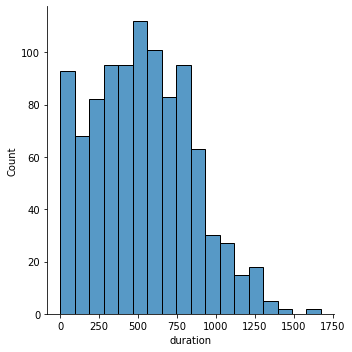

In [31]:
# вызываем функцию для тарифа 'Ultra' по минутам    
column = ultra_tariff['duration'] 
column_name = 'использовано минут в месяц'
data_stats(column, column_name)  

Видим нормальное распределение, скошенное вправо. В среднем пользователи тарифа 'Ultra' используют 526 минут, стандартное отклонение большое - 317 минут. 

Среднее значение показателя составляет: 49.31
Дисперсия показателя составляет: 2285.42
Стандартное отклонение показателя составляет: 47.81


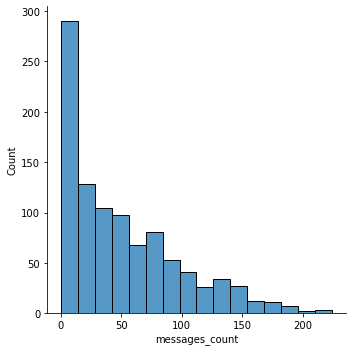

In [32]:
# вызываем функцию для тарифа 'Ultra' по сообщениям   
column = ultra_tariff['messages_count'] 
column_name = 'использовано сообщений в месяц'
data_stats(column, column_name) 

Как и у тарифа 'smart' видим Пуассоновское распределение. В среднем используется 49 сообщений. Учитывая, что лимит для сообщений 3000, эта услуга не особо популярна у клиентов,редко кто пишет больше 200 сообщений. 

Среднее значение показателя составляет: 19.47
Дисперсия показателя составляет: 97.38
Стандартное отклонение показателя составляет: 9.87


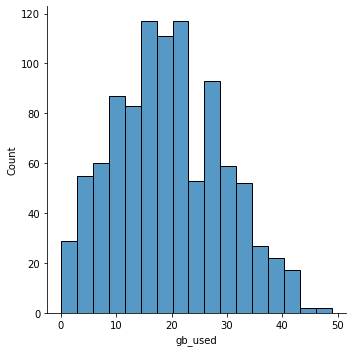

In [33]:
# вызываем функцию для тарифа 'Ultra' по интернет-трафику  
column = ultra_tariff['gb_used'] 
column_name = 'использовано Гб в месяц'
data_stats(column, column_name) 

Тоже нормальное распределение, только значения побольше чем у тарифа 'smart'. Среднее значение для 'Ultra' 19,5ГБ. И это при лимите в 30ГБ! 

Исследуя поведение пользователей тарифа 'Smart' обнаружили, что тариф новый и  по количеству платежей в месяц имеет постоянный прирост. Сделаем то же и для тарифа 'Ultra'.

In [34]:
# Построим сводную таблицу по количеству платежей в месяц. 
# Заодно сделаем колонку подсчета медианы, минимального  и максимального значения за месяц.
month_total_income_for_ultra = ultra_tariff.pivot_table(index = 'month', values = 'total_income', aggfunc = ['count', 'mean', 'median','min', 'max'])
month_total_income_for_ultra

,count,mean,median,min,max
,total_income,total_income,total_income,total_income,total_income
month,,,,,
1.0,9,1950.000000,1950,1950,1950
2.0,24,1950.166667,1950,1950,1952
3.0,37,1950.432432,1950,1950,1957
4.0,55,1950.345455,1950,1950,1957
5.0,67,1950.731343,1950,1950,1963
6.0,84,1950.595238,1950,1950,1962
7.0,91,1951.120879,1950,1950,1965
8.0,107,1950.887850,1950,1950,1968


Да, картина такая же. К концу года пользователей стало больше.

Теперь применим метод describe() ко всей таблице 'Ultra'. посмотрим среднее, медиану, минимальное и максимальное значения.

In [35]:
ultra_tariff.describe()

,user_id,age,month,duration,minutes_included,messages_count,messages_included,gb_used,gb_per_month_included,rub_monthly_fee,total_income
count,986.000000,986.000000,985.000000,986.000000,986.0,986.000000,986.0,986.000000,986.0,986.0,986.000000
mean,1262.957404,46.838742,8.250761,526.089249,3000.0,49.313387,1000.0,19.474645,30.0,1950.0,1950.800203
std,140.689268,17.099807,2.871762,317.887549,0.0,47.806040,0.0,9.868057,0.0,0.0,2.506771
min,1000.000000,18.000000,1.000000,0.000000,3000.0,0.000000,1000.0,0.000000,30.0,1950.0,1950.000000
25%,1143.000000,30.000000,6.000000,282.500000,3000.0,6.000000,1000.0,12.000000,30.0,1950.0,1950.000000
50%,1277.000000,45.000000,9.000000,518.000000,3000.0,38.000000,1000.0,19.000000,30.0,1950.0,1950.000000
75%,1381.000000,63.000000,11.000000,751.750000,3000.0,78.750000,1000.0,27.000000,30.0,1950.0,1950.000000
max,1495.000000,75.000000,12.000000,1673.000000,3000.0,224.000000,1000.0,49.000000,30.0,1950.0,1969.000000


Типичный пользователь тарифа 'ultra' 30-63 лет(25-75 квартиль). Наговаривает в среднем 529-547 минут в месяц, при лимите в 3000 минут, использует смешные 38 собщений из 1000, и тратит 19 из 30 гигабайт трафика. Если брать от 25 до 75 квартиля, то от 12 до 27 гигабайт, т.е чаще всего укладывается в  щедрый лимит тарифа. Поэтому переплат у использующих 'ultra' практически нет и они платят стабильно 1950 в месяц. Однако переплаты случаются и, судя по данным максимальных значений минут, сообщений и трафика, это происходит из-за долгого серфинга в сети. 

## Проверка гипотез

Задачей исследования было проверить 2 гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Соответственно проверку гипотез будем осуществлять по главному показателю- среднему доходу от клиентов каждого тарифа.

###  Доход от  всех пользователей тарифов «Ультра» и «Смарт»

За нулевую гипотезу возьмем "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается".
Альтернативная: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:scipy.stats.ttest_ind. Воспользуемся им.

In [36]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    ultra_tariff['total_income'], 
    smart_tariff['total_income'])

print('p-значение:total_income', results.pvalue)

if results.pvalue < alpha:
    
   
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
# тут я засомневалась, что почему-то получила p-value = 0. 
# Поэтому проверка, что срезы данных были адекватные:
print('_______________________________________________')
print('Средняя выручка по пользователям тарифа "Smart" - {:.2f}'.format(smart_tariff['total_income'].mean()))
print('Средняя выручка по пользователям тарифа "Ultra" - {:.2f}'.format(ultra_tariff['total_income'].mean()))

p-значение:total_income 0.0
Отвергаем нулевую гипотезу
_______________________________________________
Средняя выручка по пользователям тарифа "Smart" - 701.12
Средняя выручка по пользователям тарифа "Ultra" - 1950.80


Мы отвергаем нулевую гипотезу в пользу альтернативной. Средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различаются.

###  Доход от  Москвы vc Другие регионы.

За нулевую гипотезу возьмем "Средняя выручка пользователей из Москвы и других регионов одинаковы".
Альтернативная: "Средняя выручка пользователей из Москвы и других регионов различается".
Сделаем срезы из основной таблицы, далее действуем по аналогии с предыдущими расчетами.

In [37]:
 mean_income_for_moscow = df.query('city == "Москва"')
 mean_income_for_regions = df.query('city != "Москва"')

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    mean_income_for_moscow['total_income'], 
    mean_income_for_regions['total_income'])

print('p-значение:total_income', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
# Проверка(лучший друг параноика):
print('_______________________________________________')
print('Средняя выручка по пользователям из Москвы- {:.2f}'.format(mean_income_for_moscow['total_income'].mean()))
print('Средняя выручка по пользователям из других регионов - {:.2f}'.format(mean_income_for_regions['total_income'].mean()))
# Получили ненулевое p-value -Ура! Оно всё работает:)

p-значение:total_income 0.002037904768927925
Отвергаем нулевую гипотезу
_______________________________________________
Средняя выручка по пользователям из Москвы- 1153.46
Средняя выручка по пользователям из других регионов - 1068.03


Принимаем Альтернативную гипотезу- "Средняя выручка пользователей из Москвы и других регионов различается". Тест двусторонний и не дает ответа как именно они отличаються и кто платит больше, москвичи или клиенты из региона, но мы при проверке подсмотрели цифры. Клиенты "Мегалайн" из Москвы в среднем тратят больше.

## Общий вывод

Для исследования нам было предоставленно 5 отдельных таблиц, содержащие данные о клиентах, оказанных им услугах и условиях тарифов.  Из проблем в данных нашли, что колонки, содержащие даты, были переданы в неверном формате- object. Необоснованных пропусков, а также дубликатов в данных не было. Для таблицы 'messages' данные выгружены только за 364 дня. Во время предобработки данных заменили тип данных на нужный, пересчитали в таблице тарифов значения, указанные в мегабайтах на гигабайты и переименовали колонки для удобства дальнейшей работы. Округлили время звонков до целых минут(по условию).

При предварительном анализе данных было выявленно, что таблицы содержат данные о 500 клиентах, пользующихся двумя тарифами Ультра и Смарт. При более детальном изучении поведения пользователей каждого из тарифов отметили интересную особенность: Похоже оба тарифа появились только в 2018 году и активно прирастают новыми клиентами. Но, тем не менее, соотношение в пользу тарифа Smart. Его выбирают 70% клиентов и это легко объяснимо. Абонентская плата гораздо меньше. Всего 550 рублей против 1950 рублей тарифа Ultra. Исследуя поведение пользователей пришли к выводу, что выбираяя тариф с меньшей абоненской платой и небольшим лимитом услуг пользователи стабильно не укладываются в этот самый лимит по минутам и гигабайтам и  перплачивают. А те, кто выбрал дорогой тариф с большим лимитом, зачастую платят только абонентскую плату и не успевают использовать все возможности своего тарифа.

Задачей исследования было ответить на 2 вопроса:
1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Проведя статистический анализ мы приняли Альтернативную гипотезу и делаем вывод, что выручка от пользователей тарифов «Ультра» и «Смарт» различается,  также отличается выручка от клиентов из Москвы, по сравнению с другими регионами.